In [1]:
from util import open_experiment_table
df = open_experiment_table()
df

,experiment_id,generation_index,fitness,symmetry,xy_positions,population_index
0,1,0,-50.081943,0.0,"[BodyState(core_position=Vector3([0. , ...",0
1,1,0,-50.000000,0.0,"[BodyState(core_position=Vector3([0. , 0. ...",1
2,1,0,-50.300894,0.0,"[BodyState(core_position=Vector3([0. , ...",2
3,1,0,-48.281871,0.0,"[BodyState(core_position=Vector3([0. , 0. ...",3
4,1,0,-47.718634,0.0,"[BodyState(core_position=Vector3([0. , ...",4
...,...,...,...,...,...,...
4195,6,49,-32.197473,0.0,"[BodyState(core_position=Vector3([0. , 0. ...",45
4196,6,49,-31.255834,0.0,"[BodyState(core_position=Vector3([0. , 0. ...",46
4197,6,49,-31.477430,0.0,"[BodyState(core_position=Vector3([0. , 0. ...",47
4198,6,49,-30.994176,0.0,"[BodyState(core_position=Vector3([0. , 0. ...",48


In [49]:
from balance_compute import get_body_states_from_str
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [38]:
from pyrr import Quaternion, Matrix33, Vector3
import numpy as np

def rotate_vector_with_pyrr(quaternion, vector=Vector3([1.0, 0.0, 0.0])):
    # Create a Quaternion object from the given quaternion
    q = Quaternion(quaternion)
    # Convert the quaternion into a rotation matrix
    rotation_matrix = Matrix33.from_quaternion(q)
    # Apply the rotation matrix to the vector
    rotated_vector = rotation_matrix * vector
    # Return the rotated vector (you can ignore the z-component for 2D)
    return rotated_vector.xy



In [10]:
single_body = get_body_states_from_str(df["xy_positions"][0])
rotate_vector_with_pyrr(single_body[10].core_orientation)

Vector3([0.9707052 , 0.23871495])

In [2]:
# len(df[df["experiment_id"]==6])/50

len(df[(df["experiment_id"] == 6) & (df["generation_index"] == 0)])

50

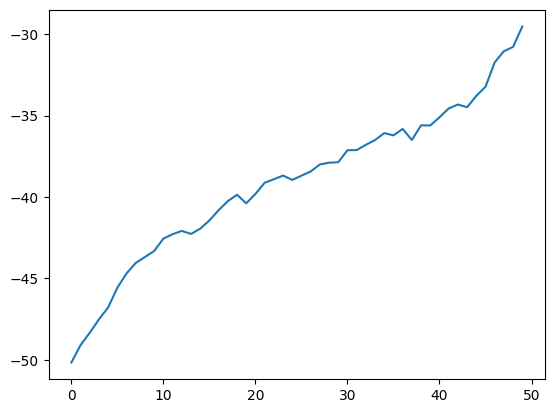

In [7]:
plt.plot(df[(df["experiment_id"] == 6)].groupby("generation_index")["fitness"].mean())

In [122]:
def plot_core_path_single_generation(body_states, exp, gen, path_type="vector", n_robots=-1, step_time=7, scale=3, seed=0, save_img=False):
    assert step_time > 0
    assert n_robots > 0 or n_robots == -1
    assert path_type in ["vector", "point", "both"]
    assert step_time > 0

    # select random robots if needed
    np.random.seed(seed)
    if n_robots == -1:
        n_robots = len(body_states)
    n_total_robots = len(body_states)
    body_states = np.random.choice(body_states, n_robots, replace=False)
    
    for i, single_robot_body_state_str in enumerate(body_states):
        # translate bodystates to readable objects
        single_robot_states = get_body_states_from_str(single_robot_body_state_str)
        
        # collect positions
        core_positions = [body_state.core_position for body_state in single_robot_states]
        final_x = [core_positions[-1].x]
        final_y = [core_positions[-1].y]
        x = [core_position.x for core_position in core_positions][::step_time]+final_x
        y = [core_position.y for core_position in core_positions][::step_time]+final_y
        
        # collect xy vector orientations
        core_xy_orientations = [rotate_vector_with_pyrr(body_state.core_orientation) for body_state in single_robot_states]
        final_vector = [core_xy_orientations[-1]]
        vectors = np.array(core_xy_orientations[::step_time]+final_vector)

        if path_type == "point" or path_type=="both":
            plt.plot(x[0], y[0], "go")      # starting point
            # plt.plot(x[-1], y[-1], "ro")    # end point
            plt.plot(x, y, color="green")   # rest of path
        
        if path_type == "vector" or path_type=="both":
            U, V = vectors[:, 0], vectors[:, 1]
            plt.quiver(x, y, U, V, 
                       angles='xy', scale_units='xy', scale=scale, linewidths=0.5, width=0.005)
            plt.quiver(final_x, final_y, final_vector[0][0], final_vector[0][1], 
                       angles='xy', scale_units='xy', scale=scale, color="red", linewidths=0.5, width=0.005)

    # useful information to console
    print(f"Number of robots shown:    {n_robots}/{n_total_robots}")
    print(f"Number of timesteps shown: {len(core_positions)//step_time}/{len(core_positions)}")
    
    # plot target at (5,5)
    plt.plot([5], 5, "rx")
    
    # boilerplate readability
    plt.grid(True)
    plt.ylim(-1,6)
    plt.xlim(-1,6)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Core path for experiment " + str(exp) + " generation " + str(gen))
    if save_img:
        plt.savefig(f"plots/paths/core_path_exp_{exp}_gen_{gen}.png", bbox_inches="tight")

    plt.show()


Number of robots shown:    50/50
Number of timesteps shown: 9/91


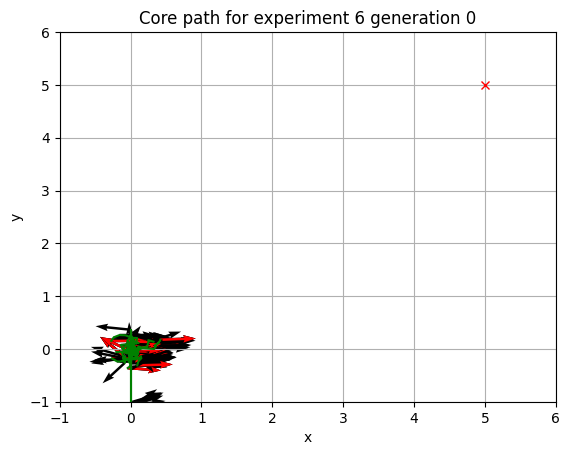

Number of robots shown:    50/50
Number of timesteps shown: 9/91


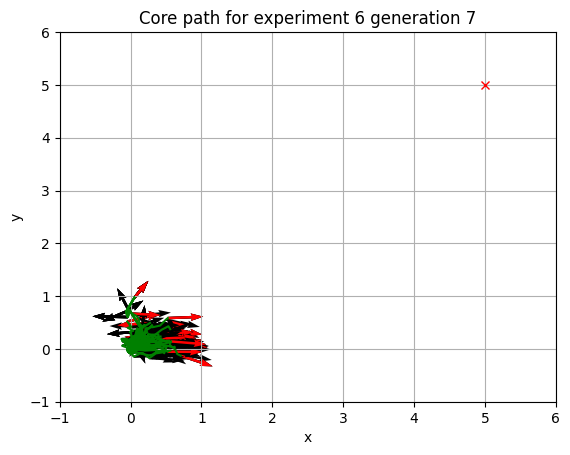

Number of robots shown:    50/50
Number of timesteps shown: 9/91


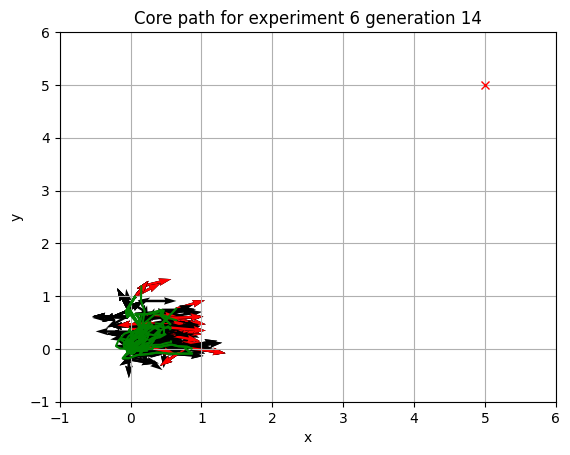

Number of robots shown:    50/50
Number of timesteps shown: 9/91


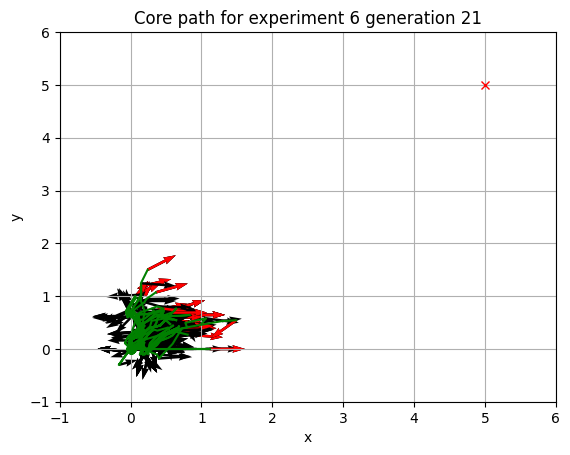

Number of robots shown:    50/50
Number of timesteps shown: 9/91


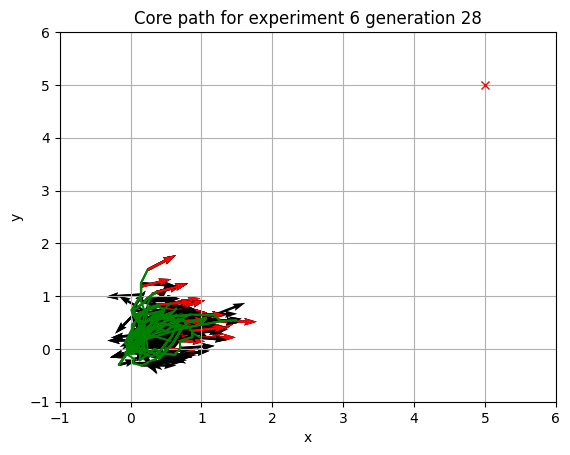

Number of robots shown:    50/50
Number of timesteps shown: 9/91


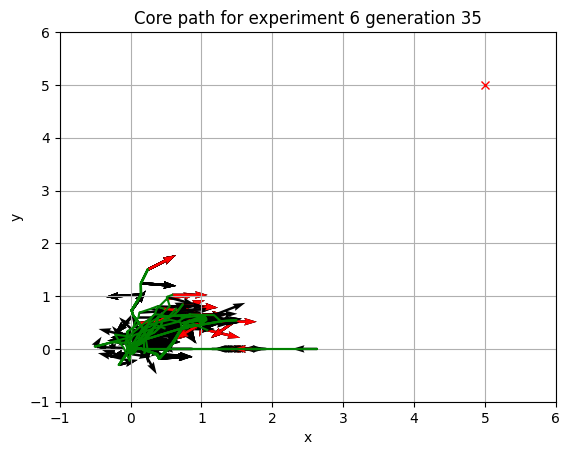

Number of robots shown:    50/50
Number of timesteps shown: 9/91


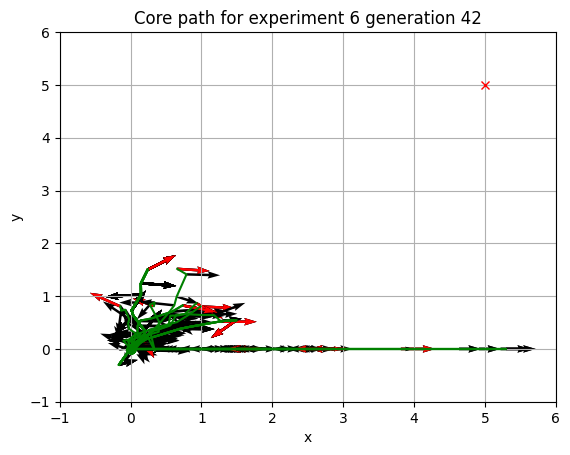

Number of robots shown:    50/50
Number of timesteps shown: 9/91


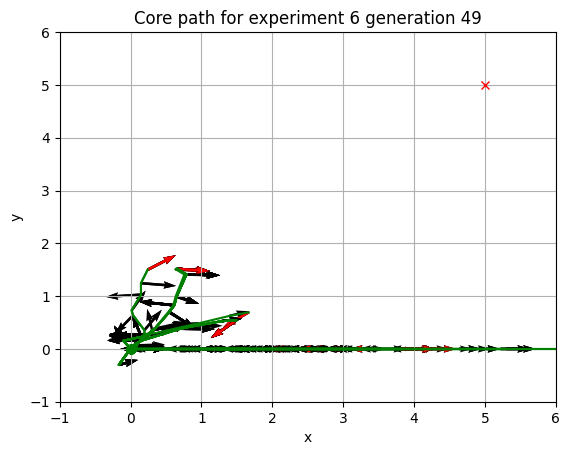

In [123]:
ex = 6
for gen in range(0,50,7):
    # gen = 49
    df_sub = df[(df["experiment_id"] == ex) & (df["generation_index"] == gen)]
    body_states = df[(df["experiment_id"] == ex) & (df["generation_index"] == gen)]["xy_positions"]
    plot_core_path_single_generation(body_states, ex, gen, path_type="both", n_robots=-1, step_time=10, scale=2, seed=None)
    # break